In [2]:
import sys
sys.path.append('/home/s/seanmacb/pkgs')
import run_six_utils as rsu
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib') 
import matplotlib.pyplot as plt
import numpy as np
import lsst.daf.butler as daf_butler


Finished detector 35 for run 6 and mask True
Finished detector 36 for run 6 and mask True


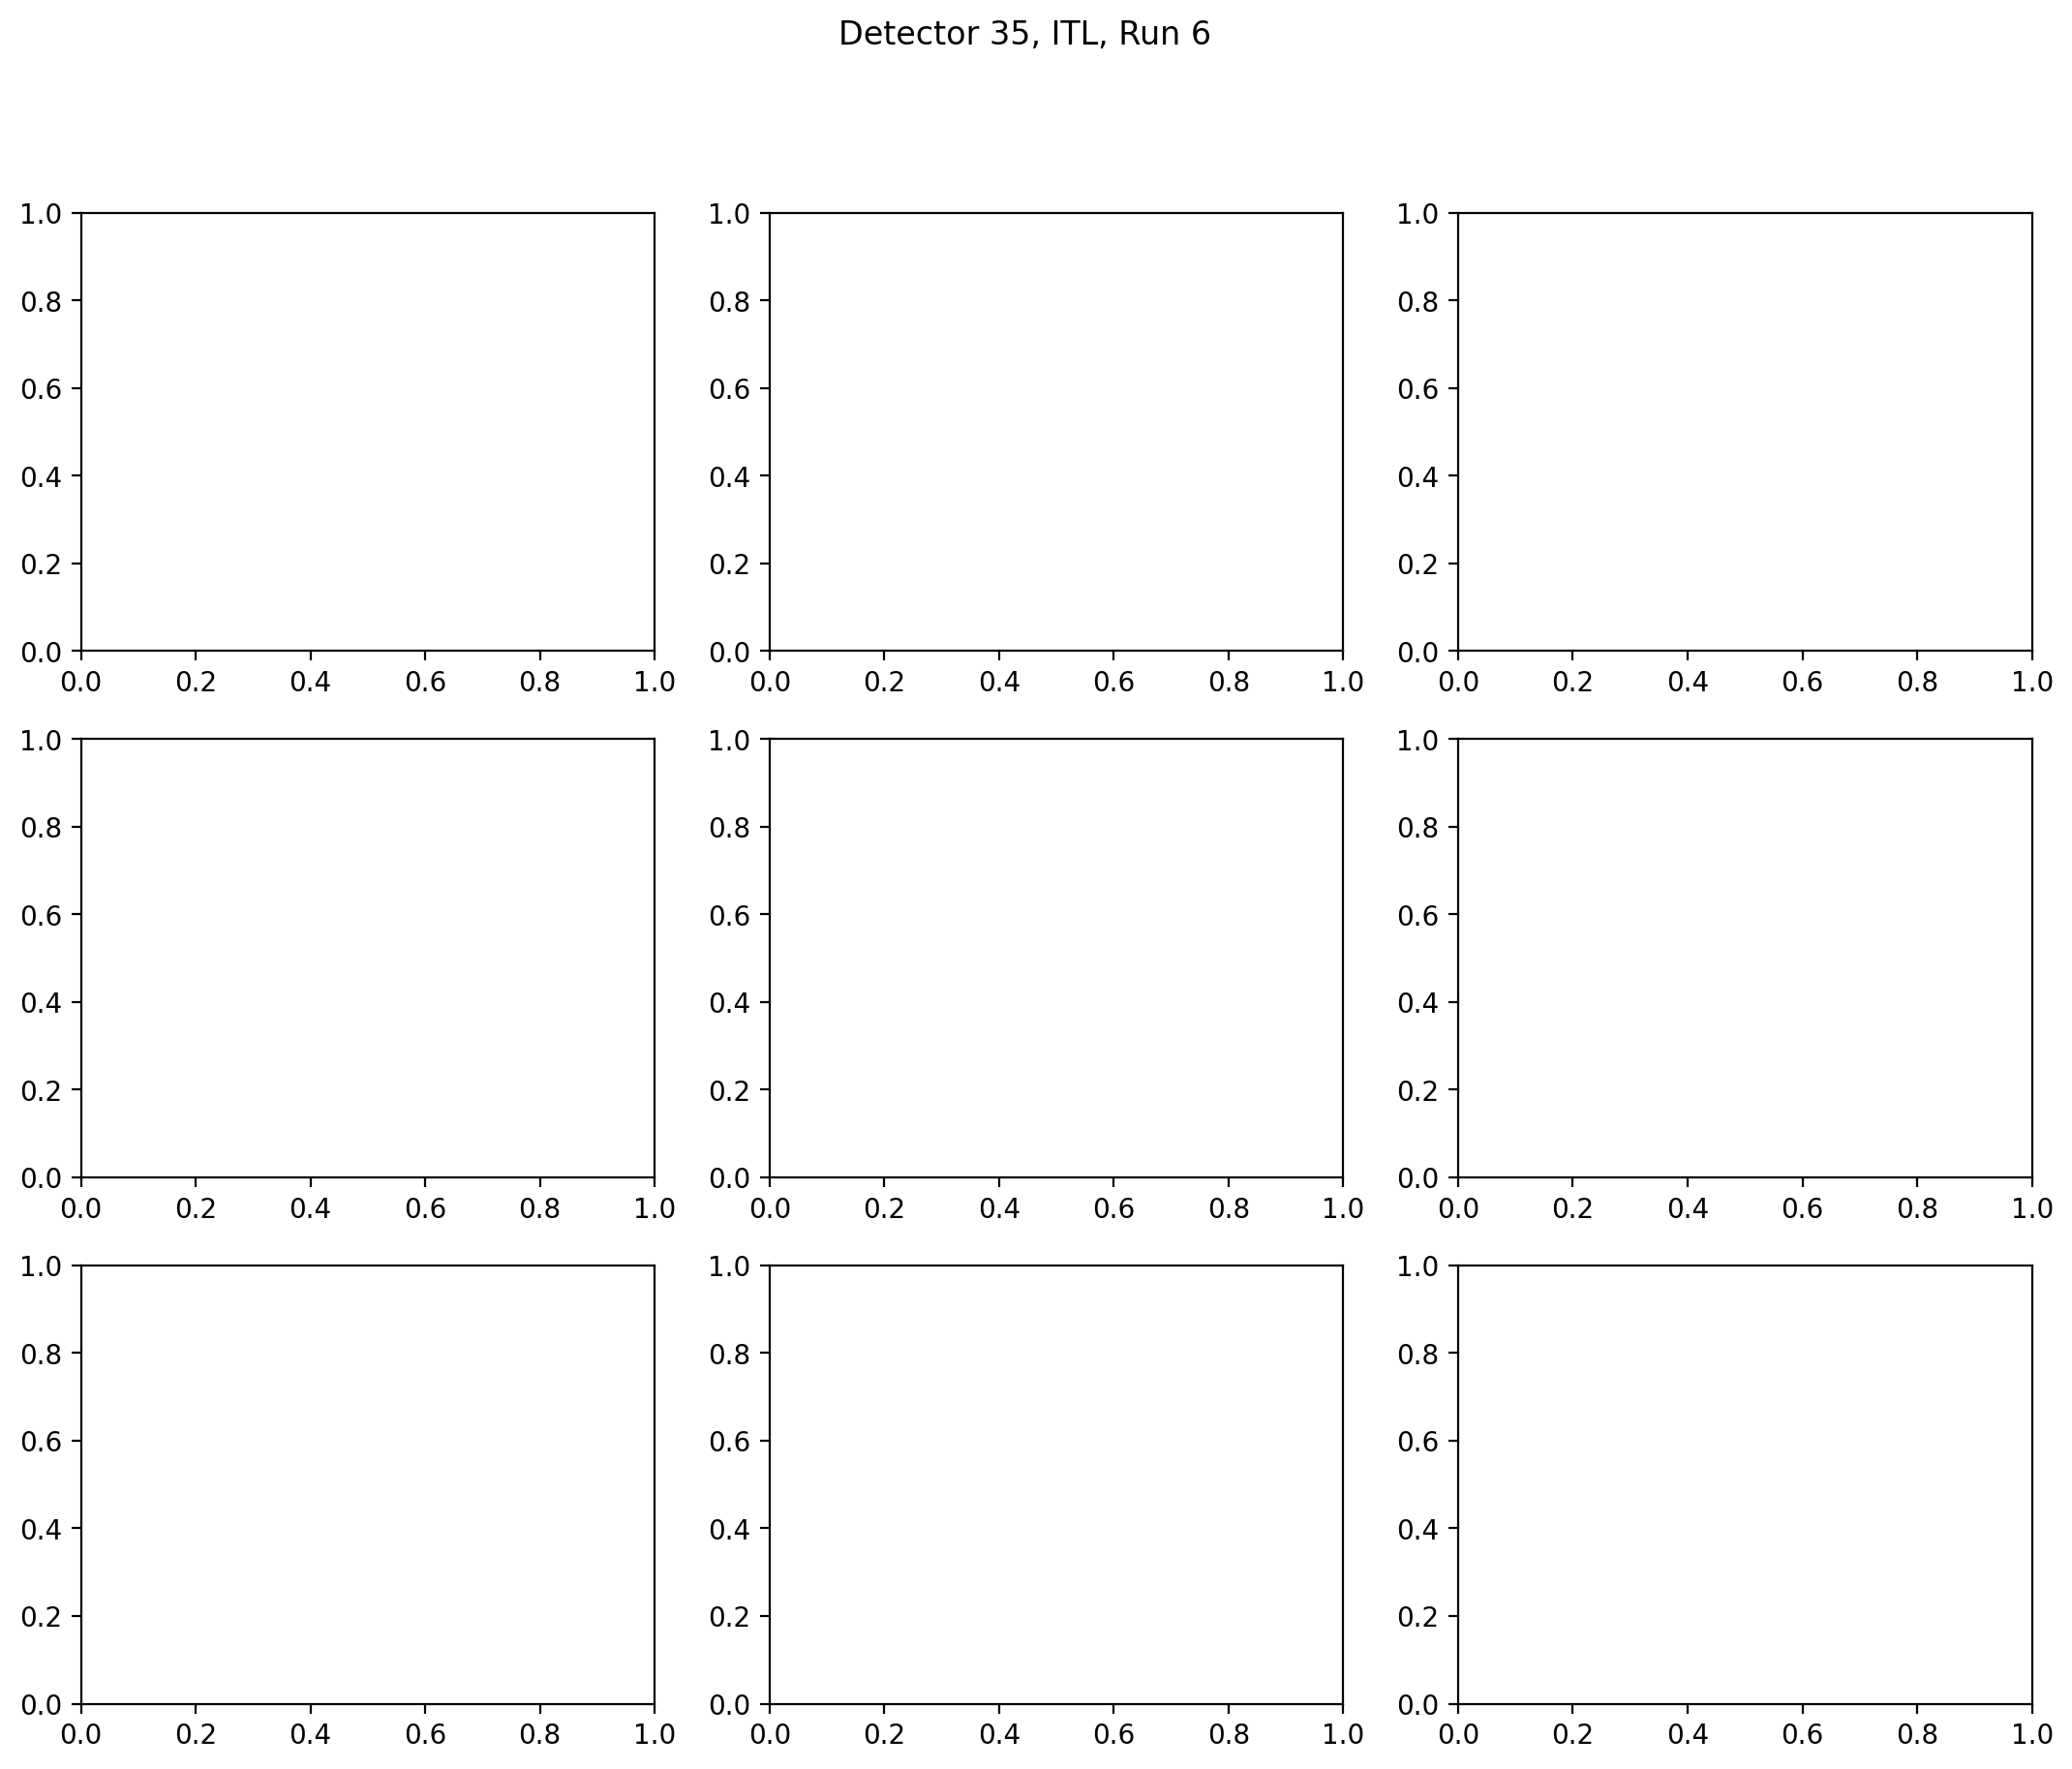

<Figure size 640x480 with 0 Axes>

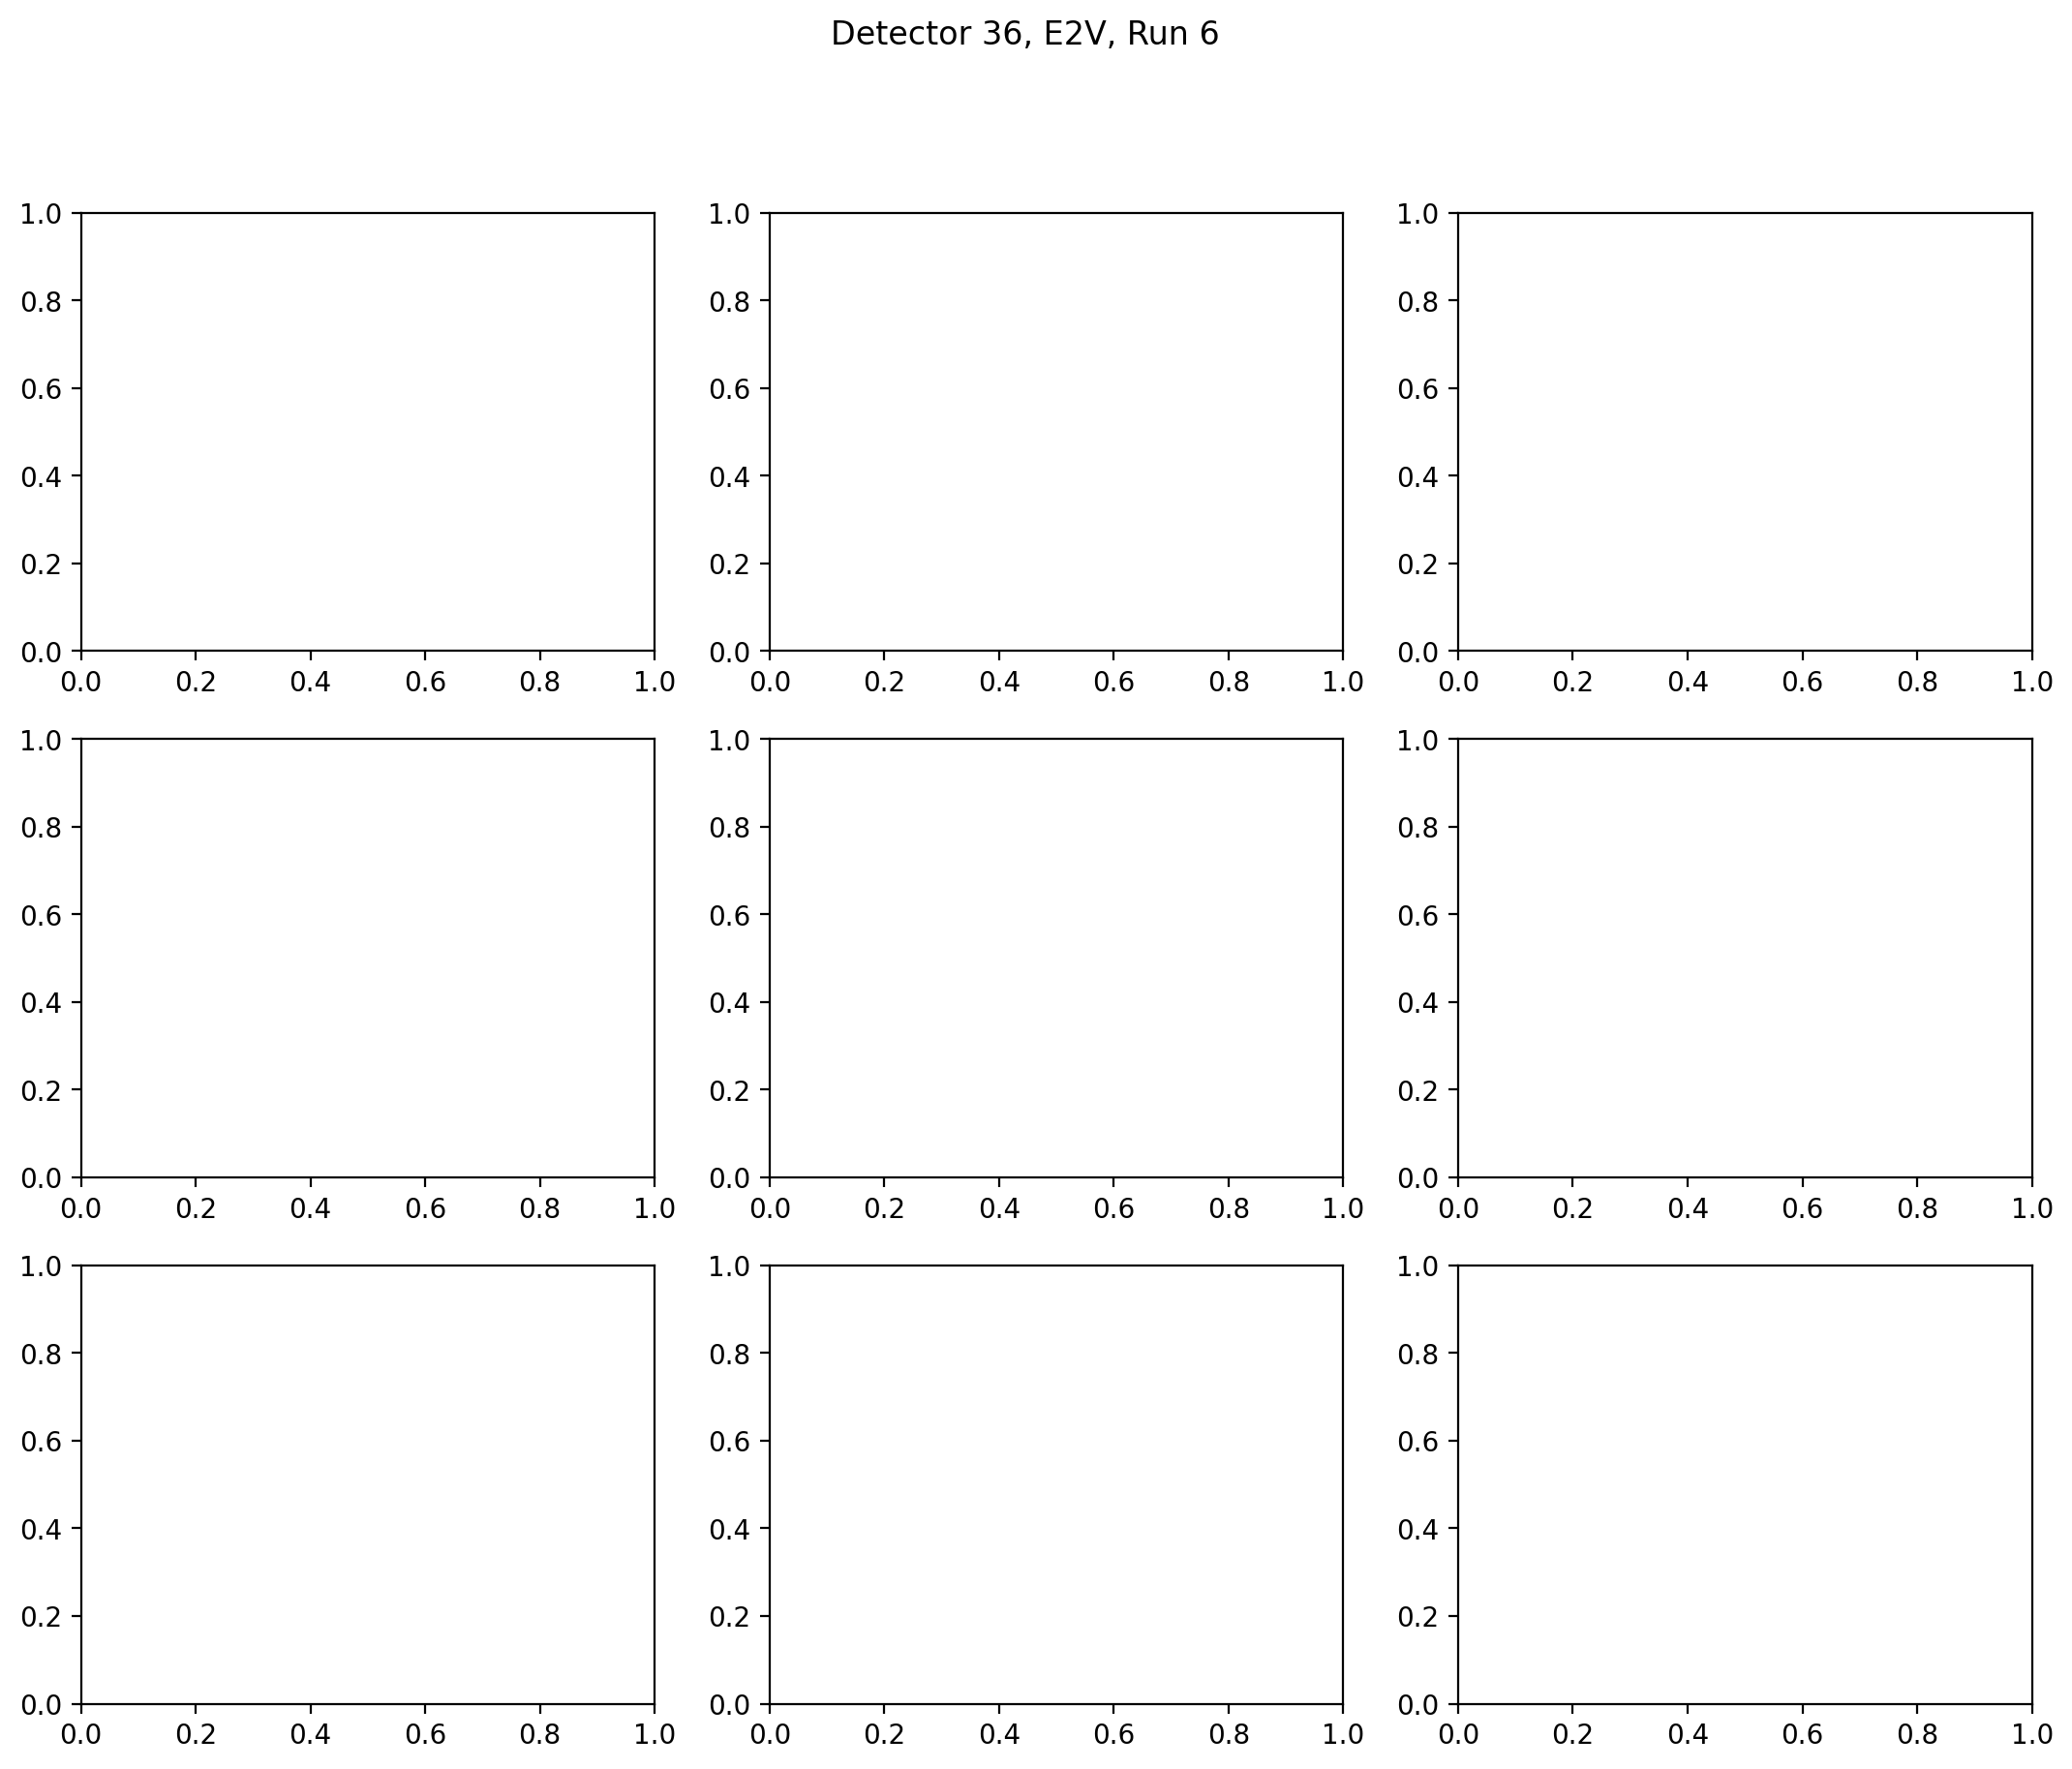

In [2]:
for mask_bool in [True]: # Should run in ~1 hour - sets if a mask is present or not
    for run_numbah in ["6"]:
        if run_numbah=="6":
            run_str = "13401_w_2023_24"
        elif run_numbah=="6b":
            run_str = "13550_w_2023_41"
        else:
            print("error!")
        for detector in [35,36]: # runs in ~17 mins
            image = rsu.edge_detectorPresentation(detector=detector,
                              edge_buffer=15,
                              tight=True,
                              save=True,
                              tick_sep=3,
                              run_number=run_str,
                              path='/home/s/seanmacb/Run6Comparisons/Figures/PictureFrameFigures_{var4}/{var2}/Run{var3}/detector_{var1}.jpg'.format(var1=detector,var2=rsu.get_serial_from_number([detector])[0],var3=run_numbah,var4=rsu.MaskBool(mask_bool)),
                              maskTransparency=0.5,
                              base_dpi=200,
                              show=False,
                              showmask=mask_bool,
                              img_type='flat',
                              run_numbah=run_numbah)
            print("Finished detector",detector,"for run",run_numbah,"and mask",mask_bool)

In [33]:
# fig,ax = plt.subplots()

# ax.imshow(image.image.array)
# ax.imshow(imag)

# plt.show()

image.getMask().array[0:50,0:50]

array([[1024, 1024, 1024, ..., 1024, 1024, 1024],
       [1024, 1024, 1024, ..., 1024, 1024, 1024],
       [1024, 1024, 1024, ..., 1024, 1024, 1024],
       ...,
       [1024, 1024, 1024, ...,    0,    0,    0],
       [1024, 1024, 1024, ...,    0,    0,    0],
       [1024, 1024, 1024, ...,    0,    0,    0]], dtype=int32)

In [ ]:
for mask_bool in [True,False]: # Should run in ~1 hour - sets if a mask is present or not
    for run_numbah in ["6"]:
        if run_numbah=="6":
            run_str = "13401_w_2023_24"
        elif run_numbah=="6b":
            run_str = "13550_w_2023_41"
        else:
            print("error!")
        for detector in [35,36]: # runs in ~17 mins
            rsu.edge_detector(detector=detector,
                              edge_buffer=15,
                              tight=True,
                              save=True,
                              tick_sep=3,
                              run_number=run_str,
                              path='/home/s/seanmacb/Run6Comparisons/Figures/PictureFrameFigures_{var4}/{var2}/Run{var3}/detector_{var1}.jpg'.format(var1=detector,var2=rsu.get_serial_from_number([detector])[0],var3=run_numbah,var4=rsu.MaskBool(mask_bool)),
                              maskTransparency=0.5,
                              base_dpi=200,
                              show=False,
                              showmask=mask_bool,
                              img_type='flat',
                              run_numbah=run_numbah)
            print("Finished detector",detector,"for run",run_numbah,"and mask",mask_bool)

In [3]:
img= 'flat'
run = ['13401_w_2023_24','13391_w_2023_24', '13550_w_2023_41','13505_w_2023_41']

In [4]:
detector=100

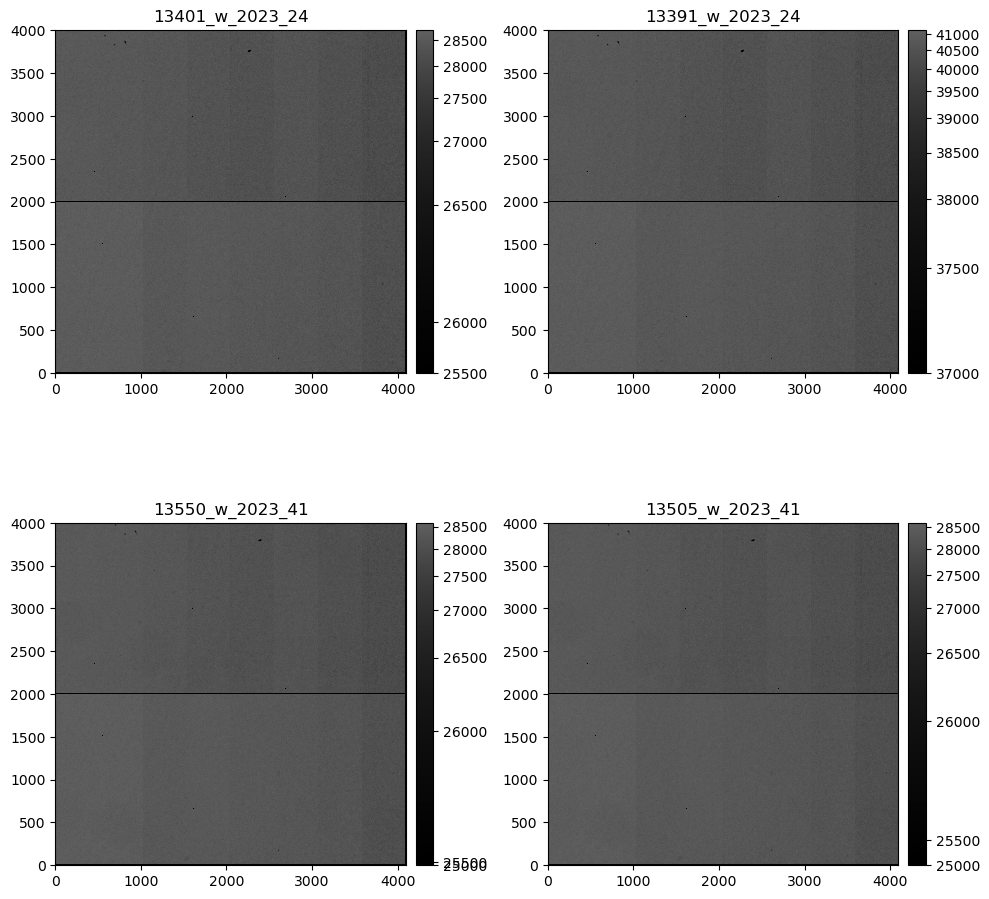

In [5]:
fig,axs = plt.subplots(2,2,figsize=[10,10])
axs = axs.flatten()
iter=0
for r in run:
    image = rsu.getImage(img,r,detector)

    disp = afwDisplay.Display(fig)
    disp.scale('asinh','zscale')
    
    rsu.formatter(disp)
    plt.sca(axs[iter])
    disp.mtv(image, title=r)
    iter+=1

fig.tight_layout()
# fig.savefig("/home/s/seanmacb/Run6Comparisons/test.jpg")

In [6]:
dicta = image.getMetadata().toDict()

In [7]:
dicta

{'CALIB_CREATION_DATE': '2023-11-04',
 'CALIB_CREATION_TIME': '15:44:23 PDT',
 'RUNNUM': '13505',
 'CCD_MANU': 'E2V',
 'CCD_TYPE': 'CCD250',
 'TESTTYPE': 'SFLAT_HI',
 'IMGTYPE': 'FLAT',
 'DETSIZE': '[1:4096,1:4004]',
 'BINX': 1,
 'BINY': 1,
 'CCDGAIN': 1.0,
 'CCDNOISE': 10.0,
 'CCDSLOT': 'S01',
 'RAFTBAY': 'R23',
 'FIRMWARE': '3139500e',
 'PLATFORM': 'ir2-camera',
 'CONTNUM': '18910e0c',
 'DAQVERS': 'R5-V6.9 2023-09-11T17:05:01Z (9eb7c3ed)',
 'DAQPART': 'camera',
 'DAQFOLD': 'raw',
 'OBSANNOT': '',
 'CAMCODE': 'MC',
 'CONTRLLR': 'C',
 'DAYOBS': '20231103',
 'HEADVER': 2,
 'INSTRUME': 'lsstCam',
 'TELESCOP': 'LSST',
 'TSTAND': 'BOT',
 'SEQFILE': 'FP_E2V_2s_ir2_v26.seq',
 'SEQCKSUM': '1010041586',
 'LSST_NUM': 'E2V-CCD250-239',
 'CCD_SERN': '15462-09-04',
 'REBNAME': 'LCA-13574-005',
 'RAFTNAME': 'LCA-11021_RTM-005',
 'FPVERS': '1.2.4',
 'IHVERS': '1.1.4',
 'FILTER': 'ef_43',
 'FILTER1': 'HIGH',
 'FILTER2': None,
 'CCOBLED': 'nm750',
 'CCOBCURR': 0.273,
 'CCOBFLST': 0.900037,
 'CCOBFLUX'

In [18]:
base_str = "LSST GAIN C"

for r in run:
    print(r)
    print(20*"-")
    image = rsu.getImage(img,r,detector)
    dicta = image.getMetadata().toDict()
    for k in range(18):
        if k>7 and k<10:
            continue
        if len(str(k))==1:
            k="0"+str(k)
        key = teststr+str(k)
        print(key,dicta[key])
    print()

13401_w_2023_24
--------------------
LSST GAIN C00 1.17471
LSST GAIN C01 1.17945
LSST GAIN C02 1.18891
LSST GAIN C03 1.18668
LSST GAIN C04 1.1894
LSST GAIN C05 1.1937
LSST GAIN C06 1.19837
LSST GAIN C07 1.20556
LSST GAIN C10 1.18807
LSST GAIN C11 1.1893
LSST GAIN C12 1.19811
LSST GAIN C13 1.19985
LSST GAIN C14 1.20365
LSST GAIN C15 1.20603
LSST GAIN C16 1.20539
LSST GAIN C17 1.21277

13391_w_2023_24
--------------------
LSST GAIN C00 1.17471
LSST GAIN C01 1.17945
LSST GAIN C02 1.18891
LSST GAIN C03 1.18668
LSST GAIN C04 1.1894
LSST GAIN C05 1.1937
LSST GAIN C06 1.19837
LSST GAIN C07 1.20556
LSST GAIN C10 1.18807
LSST GAIN C11 1.1893
LSST GAIN C12 1.19811
LSST GAIN C13 1.19985
LSST GAIN C14 1.20365
LSST GAIN C15 1.20603
LSST GAIN C16 1.20539
LSST GAIN C17 1.21277

13550_w_2023_41
--------------------
LSST GAIN C00 1.51986
LSST GAIN C01 1.52111
LSST GAIN C02 1.53424
LSST GAIN C03 1.53228
LSST GAIN C04 1.53714
LSST GAIN C05 1.53805
LSST GAIN C06 1.54279
LSST GAIN C07 1.55802
LSST GAIN C10

In [53]:
! cd /home/a/abrought; ls 

alternate_branches  dc2-setup.sh       roman-desc-sims	setup_for_a23.sh
auxtel-com	    dev-setup.sh       rubin-user	setupImSim.sh
BF		    d_latest_setup.sh  run5		simulated
bin		    eo-pipe-setup.sh   run5-setup.sh	tag_setup.sh
DATA		    idleculler	       run6		ts7-1
dc2		    loadDM.sh	       run6-setup.sh	ucd
DC2-analysis	    notebooks	       scons.sh		WORK


# Yousuke's blurb

In [93]:
repo_path = "/repo/ir2" # The path where the data taken in the ir2 cleanroom is stored
collections = 'LSSTCam/raw/all,LSSTCam/calib'.split(",") # Defining collections (that are ignored by below kernel)
but = Butler.Butler(repo_path,collections=collections) # Initializing a butler with the ir2 path and the above collections
registry = butler.registry # converting the butler to a RegistryShim to query the datatypes

list(registry.queryCollections('*u/abrought/run6/ptc*'))

['u/abrought/run6/ptc.2024.02.11.nonlinear/20240212T020234Z',
 'u/abrought/run6/ptc.2024.02.13/20240213T174239Z',
 'u/abrought/run6/ptc.2024.02.14/20240214T085512Z',
 'u/abrought/run6/ptc.2024.02.15/20240214T192943Z',
 'u/abrought/run6/ptc.2024.02.11.nonlinear',
 'u/abrought/run6/ptc.2024.02.13',
 'u/abrought/run6/ptc.2024.02.14',
 'u/abrought/run6/ptc.2024.02.15']

In [166]:
from lsst.ip.isr.isrTask import IsrTask
import lsst.daf.butler as Butler
repo = '/repo/ir2'
image = 'flat'
butler_collections = 'LSSTCam/raw/all,LSSTCam/calib'.split(",")
butler = Butler.Butler(repo,collections=butler_collections)

detector = 100

In [167]:
ptc = butler.get('ptc', collections='u/abrought/run6/ptc.2024.02.15', instrument="LSSTCam", detector=detector)
linearity = butler.get('linearizer', detector=detector, instrument='LSSTCam', collections='u/abrought/run6/linearizer.2024.02.11')

# for Run 6 (gains at ~1.5)
run = '13550_w_2023_41' # 2023/11/16
defects = butler.get('defects', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13550_w_2023_41')
bias = butler.get('bias', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13550_w_2023_41')
dark = butler.get('dark', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13550_w_2023_41')

# For previous run (gains at ~1.1-1.2)
# defects = butler.get('defects', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13557_w_2023_49')
# bias = butler.get('bias', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13557_w_2023_49')
# dark = butler.get('dark', detector=detector, instrument='LSSTCam', collections='u/lsstccs/defects_13557_w_2023_49')
# run = '13401_w_2023_24' # previous run

In [168]:
# refs = list(set(butler.registry.queryDatasets(["flat"], findFirst=True).expanded()))
base_dir = "u/lsstccs/"

collection = base_dir+image+"_"+run

kwargs={
        "datasetType": "raw",
        "collections": collection,
        "where":
        """
        instrument='LSSTCam' and 
        detector = {var}
        """.format(var=detector)
        }

registry = butler.registry
        
refs = list(registry.queryDatasets(**kwargs))

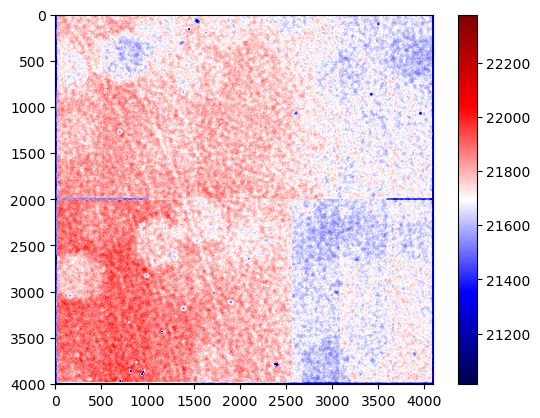

In [172]:
img = butler.get(refs[0])
isr = IsrTask()
isr.config.doLinearize=True
isr.config.doDark=True
isr.config.doBias=True
isr.config.doFlat=False
isr.config.doDefect=True
#isr.config.usePtcGains=True
isr.config.doApplyGains=True
isr.config.overscan.fitType = 'MEDIAN_PER_ROW'
isr.config.overscan.doParallelOverscan = True 
#isr.config.overscan.fitType: 'AKIMA_SPLINE'
#isr.config.overscan.fitType: 'MEAN'
postISRCCD = isr.run(img,
                     defects=defects,
                     ptc=ptc,
                     bias=bias,
                     dark=dark,
                     linearizer=linearity
                    )

#plt.imshow(postISRCCD.exposure.image.array)
mean=postISRCCD.exposure.image.array.mean()
std=postISRCCD.exposure.image.array.std()
plt.imshow(postISRCCD.exposure.image.array,vmin=mean-std,vmax=mean+std,cmap='seismic')
plt.colorbar()

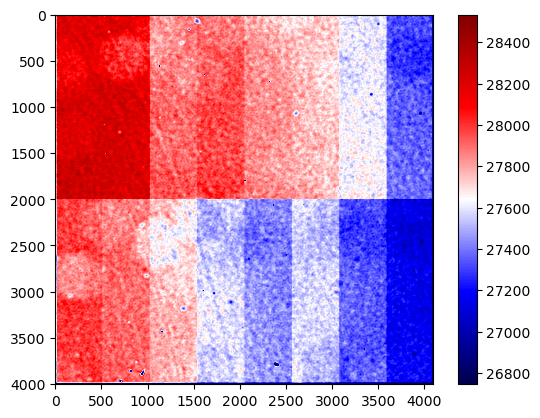

In [170]:
post_image = rsu.getImage('flat',"13505_w_2023_41",100)
mean=post_image.image.array.mean()
std=post_image.image.array.std()
plt.imshow(post_image.image.array,vmin=mean-std,vmax=mean+std,cmap='seismic')
plt.colorbar()

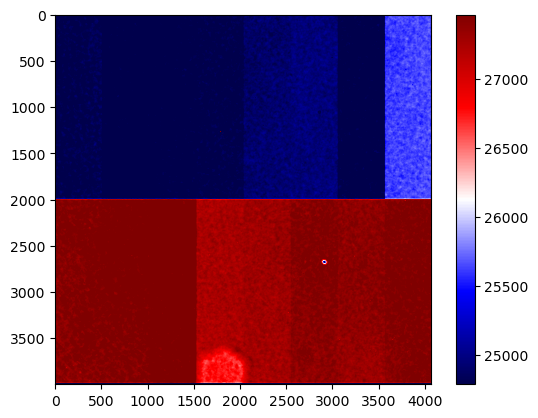

In [138]:
post_image = rsu.getImage('flat',"13550_w_2023_41",80)
mean=post_image.image.array.mean()
std=post_image.image.array.std()
plt.imshow(post_image.image.array,vmin=mean-std,vmax=mean+std,cmap='seismic')
plt.colorbar()

In [3]:
collections = 'LSSTCam/raw/all'
butler = daf_butler.Butler('/repo/main',collections=collections)
registry = butler.registry
# for num in ["12606","12610","12741","12795","12845"]:
#     refs = butler.registry.queryDatasets("bias", where="exposure.science_program in ('{}')".format(num))
#     for results in refs.byParentDatasetType(): # querying datasets using a butler on the defects collection
#         n=results.count(exact=False) # Counting the number of files in the directory
#         if n==0: # If the directory is empty
#             continue
#         print(results.parentDatasetType.name, n) # Otherwise, print the name of the parentDatasetType and the number of entries

In [13]:
where = "exposure.science_program=myrun"
detector=100
run='12845'
refs = list(butler.registry.queryDatasets("raw", where=where,  bind={"myrun": run}, detector=detector))

ColumnError: Cannot join dimension element exposure whose dimensions are not a subset of {band, instrument, detector, physical_filter}.

In [12]:
refs

[DatasetRef(DatasetType('raw', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTCam', detector: 100, exposure: 3021012800005, band: 'unknown', day_obs: 20210128, group: '3021012800005', physical_filter: 'unknown'}, run='LSSTCam/raw/all', id=139c7362-564d-5e4c-8713-70b017ace493),
 DatasetRef(DatasetType('raw', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTCam', detector: 100, exposure: 3021012800006, band: 'unknown', day_obs: 20210128, group: '3021012800006', physical_filter: 'unknown'}, run='LSSTCam/raw/all', id=6b781ce1-f358-506c-aa99-3871b03fde9f),
 DatasetRef(DatasetType('raw', {band, instrument, day_obs, detector, group, physical_filter, exposure}, Exposure), {instrument: 'LSSTCam', detector: 100, exposure: 3021012800007, band: 'unknown', day_obs: 20210128, group: '3021012800007', physical_filter: 'unknown'}, run='LSSTCam/raw/all', id=a559398a-7d18-5509-a2d7-55de6ea33573),
 

In [11]:
img_type = "flat"
run = "12845"
weekly = "w_2021_5"
detector_number = 100
repo='/repo/main'
img = rsu.getImage(img_type,run+"_"+weekly,detector_number,repo=repo)

MissingCollectionError: No collection with name 'u/lsstccs/flat_12845_w_2021_5' found.

In [5]:
# all_repos = [ "/repo/ir2", "/repo/hsc-temp", "/repo/oga", "/repo/embargo.sasquatch_dev", "/repo/main.sasquatch_dev", "LSSTComCam", "/repo/ops-rehearsal-3-prep", "/repo/ops-rehearsal-3-prep.sasquatch_dev", "/repo/ops-rehearsal-3-prep+sasquatch_dev", "/repo/dc2", "/repo/main+sasquatch_dev", "/repo/embargo+sasquatch_dev", "/repo/aos_imsim", "/repo/main", "LATISS", "/repo/embargo", "LSSTCam", "/repo/ucd", "embargo", "/repo/tts", "/repo/bts", "ops-rehearsal-3-prep"]
# for rep in all_repos:
#     print(rep)
#     but = daf_butler.Butler(rep,collection=collections)
#     print(but.registry.queryCollections("*12781*"))